# Minh họa dữ liệu

Khi làm việc với dữ liệu dạng bảng, bạn cần đào sâu vào dữ liệu để tìm kiếm những điều ẩn giấu. Để có thể hiểu được những đặc điểm của dữ liệu, phương pháp hiệu quả nhất là minh họa chúng dưới dạng đồ thị. Phần phụ lục này sẽ giới thiệu các loại đồ thị thường được sử dụng khi làm việc với dữ liệu dạng bảng.

Chúng ta sẽ sử dụng bộ dữ liệu California Housing để minh họa.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
housing_path = "https://media.githubusercontent.com/media/tiepvupsu/tabml_data/master/california_housing/"
df = pd.read_csv(housing_path + "housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## Histogram

Histogram là biểu đồ được sử dụng thường xuyên nhất. Biểu đồ này giúp chúng ta có cái nhìn bao quát về phân bố dữ liệu. Biểu đồ này được vẽ sử dụng phương thức [`.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html). Biểu đồ này thể hiện số lượng điểm dữ liệu có giá trị theo cột nào đó rơi vào từng khoảng.

Ví dụ, để vẽ histogram của cột `total_rooms`, ta có thể làm như sau:

In [2]:
df["total_rooms"].hist();

Mặc định, dải giá trị của dữ liệu được chia làm 10 khoảng đều nhau. Chúng ta có thể chia thành nhiều khoảng hơn để có cái nhìn chính xác hơn. Việc này có thể được thực hiện bằng cách khai báo giá trị cho `bins`:

<AxesSubplot:>

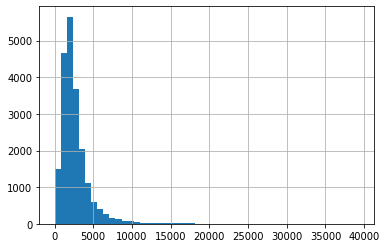

In [3]:
df["total_rooms"].hist(bins=50)

Phương thức `.hist()` cũng có thể được sử dụng để vẽ histogram cho nhiều cột một lúc như dưới đây.

/home/tiepvu/w/tabml_book/tabml_book_env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


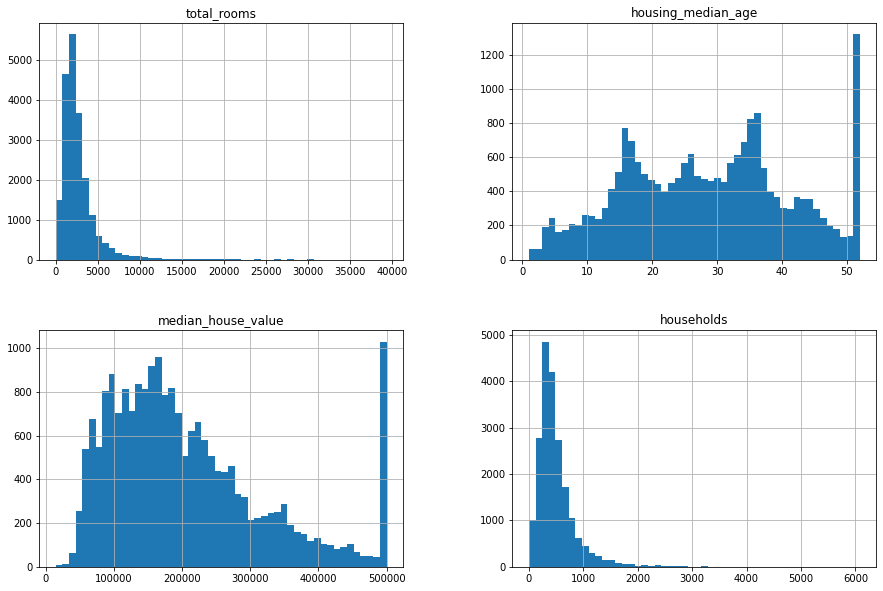

In [4]:
df[["total_rooms", "housing_median_age", "median_house_value", "households"]].hist(
    bins=50, figsize=(15, 10)
);

Với dữ liệu dạng hạng mục, trong ví dụ này là `ocean_proximity`, ta cũng có thể sử dụng `.hist()` để thể hiện số lượng phần tử của từng hạng mục.

In [5]:
df["ocean_proximity"].hist();

Các chức năng khác của phương thức này có thể được tìm thấy tại [website chính thức của pandas]((https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).

(sec_boxplot)=
## Box plot

Box plot thường được sử dụng để kiểm chứng xem dữ liệu có lệch không và hiển thị các điểm dữ liệu ngoại lệ. Xin bắt đầu mục này bằng hình dưới đây.

![](https://miro.medium.com/max/770/1*2c21SkzJMf3frPXPAR_gZA.png)

(Nguồn [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51))

Box plot là một biểu đố khác thường được dùng để biểu diễn phân bố dữ liệu và các điểm ngoại lệ. Trong hình vẽ trên, các điểm được định nghĩa như sau:

* Trung vị (_Median_, đường màu vàng) là điểm phân chia các giá trị thành hai nửa, mỗi nửa có số lượng điểm bằng nhau.

* Tứ phân vị thứ nhất (Q1) là trung vị của nửa bên trái trung vị. Nói cách khác, có đúng 25% số điểm dữ liệu nhỏ hơn Q1.

* Tứ phân vị thứ ba (Q3) là trung vị của nửa bên phải trung vị. Nói cách khác, có đúng 25% số điểm dữ liệu lớn hơn Q3.

* IQR là khoảng cách từ Q1 đến Q3. Khoảng này chứa đúng một nửa số điểm dữ liệu.

* Điểm cực tiểu (_Minimum_) được định nghĩa là `Q1 - 1.5*IQR` là điểm nằm về phía trái của Q1 một khoảng gấp rưỡi IQR. Chú ý: điểm này không phải là giá trị nhỏ nhất của trường dữ liệu đang xét.

* Điểm cực đại (_Maximum_) được định nghĩa tương tự, bằng `Q3 + 1.5*IQR` là điểm nằm về phía phải của Q3 một khoảng gấp rưỡi IQR. Điểm này cũng không phải là giá trị lớn nhất của trường dữ liệu đang xét.

* Các điểm màu xanh nằm ngoài đoạn [cực tiểu, cực đại] được coi là các điểm ngoại lệ (_outliers_).

Khi sử dụng Box plot, một giả thiết được đặt ra là các điểm dữ liệu thông thường nên nằm trong khoảng [cực tiểu, cực đại]. Những điểm nằm ngoài khoảng này được coi là ở vị trí quá xa so với phần còn lại của dữ liệu.

Để hiểu tại sao lại lấy khoảng `1.5*IQR`, hãy xem so sánh giữa boxplot và phân phối chuẩn như hình dưới đây


![](https://miro.medium.com/max/770/1*NRlqiZGQdsIyAu0KzP7LaQ.png)


(Nguồn [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51))

Nếu các điểm dữ liệu tuân theo phân phối chuẩn, trung vị chính là trung bình. 50% số điểm cũng nằm rất gần với trung bình và chỉ có 0.7% số điểm nằm ngoài khoảng [cực tiểu, cực đại]. Các điểm cực đại, cực tiểu này cũng gần với vị trí $3\sigma$. Quy tắc $3\simga$ nói rằng 99.7% các điểm trong phân phối chuẩn nằm trong khoảng $\pm 3 \sigma$ của điểm trung bình. Có thể nói, boxplot là ước lượng gần đúng của quy tắc $3 \sigma$ được khái quát lên với dữ liệu tuân theo phân phối bất kỳ.


Các giá trị cực tiểu và cực đại thường được dùng để làm điểm cắt của dữ liệu. Tức là những điểm nhỏ hơn cực tiểu sẽ bị cắt về cực tiểu, những điểm lớn hơn cực đại sẽ được cắt về cực đại. Xem thêm {ref}`sec_numeric_outliers`.

Đoạn code dưới đây thể hiện cách minh họa box plot cho cột `housing_median_age`. Mặc định, box plot được vẽ ở dạng thẳng đứng.

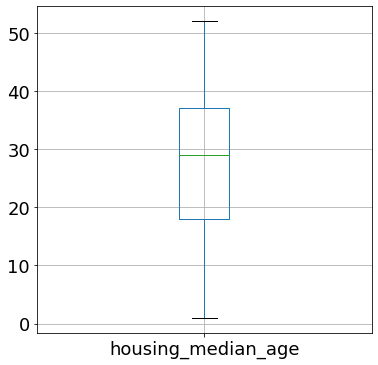

In [6]:
points = df[["housing_median_age"]].boxplot(figsize=(6,6), fontsize=18)

Trong hình này:

* Đoạn thẳng màu xanh lục ở gần 30 là trung vị.

* Cạnh dưới của _box_ là Q1, cạnh trên là Q3.

* Các điểm cực đại và cực tiểu không được minh họa trên hình. Điểm thấp nhất gần 0 là _điểm dữ liệu có giá trị nhỏ nhất_ lớn hơn điểm cực tiểu. Lưu ý rằng điểm cực tiểu trong box plot không nhất thiết phải là một điểm dữ liệu. Tương tự, điểm cao nhất ở mức trên 50 là giá trị cao nhất của dữ liệu.

* Với cột `housing_median_age` này, dữ liệu tương đối tập trung nên không có điểm ngoại lệ.

Xét sang cột `median_house_value`:

In [7]:
points = df[["median_house_value"]].boxplot(figsize=(6,6), fontsize=18)

Ở box plot này, ta thấy rằng có một vài điểm đen nằm trên mốc cực đại gần 500000. Một điểm nữa có thể nhận thấy rằng phần lớn các điểm dữ liệu (75%) có giá trị thấp hơn khoảng 270000. Box plot cũng giúp ta thấy dữ liệu bị lệch về phía nào.

Box plot dưới đây cho `total_rooms` cho ta thấy rằng có khá nhiều điểm ngoại lệ.

In [8]:
df[["total_rooms"]].boxplot(figsize=(6,6), fontsize=18)

<AxesSubplot:>